In [1]:
import skimage
from skimage import io

import os 
import matplotlib.pyplot as plt


In [2]:
DIR_IMAGES = "images"

In [3]:
breast = io.imread(os.path.join(DIR_IMAGES, "breast_Xray.tif"))
breast.shape

(571, 482)

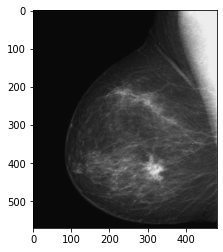

In [4]:
plt.imshow(breast, cmap='gray');

In [5]:
breast.dtype

dtype('uint8')

#### 1(a). Grafique el inverso de la imagen `breast`

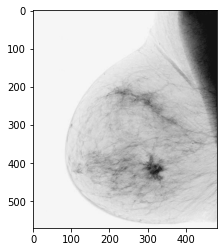

In [6]:
plt.imshow(breast.max()-breast, cmap='gray');

#### 1(b). Cree una función para realizar un ajuste de contraste de tal forma que mapee los valores de intensidad  de la imagen de entrada a nuevos valores de intensidad en la imagen de salida.  La función debe usarse de la siguiente forma `im_out=image_adjust(im_in, range_in= (low_in, high_in), range_out=(low_out, high_out), gamma)`. La función mapea los valores entre low_in y high_in a valores entre low_out y hight out, de tal forma que los valores por debajo de low_in y por encima de high_out son cortados.  La función debe aceptar cualquier tipo de imagen (en escala de grises), y el resto de parámetros (que no es la imagen), debe estar entre 0 y 1 (siendo cero el valor mínimo de intensidad y 1 correspondiente al valor máximo del formato, por ejemplo en uint8, 1 corresponde a 255).  El parámetro gamma especifica la forma de la curva que mapea la intensidad de los valores de la imagen de entrada a la de salida. La siguiente figura aclara como debe ser la forma que produce dicha función:
![](https://github.com/santialferez/introCV/blob/main/S7_taller/images/ajustarimagen.png?raw=1)

Sugerencia: Para convertir un rango de imágenes de (a,b) a (c, d) se puede utilizar la ecuación de una recta : $$y = ((d-c) / (b-a)) * (x-a) + c$$ Sin embargo, es mejor usar una ecuación más generalizada:
$$y = ((x-a) / (b-a)) ^ \gamma * (d-c) + c$$ Si $\gamma$ es igual a 1, entonces se usa la ecuación lineal.
Cuando gamma no es igual a 1, la transformación no es lineal. Es recomendable usar `skimage.util.img_as_float`.

In [7]:
def image_adjust(im_in, range_in= (0, 1), range_out=(0, 1), gamma=1):
    a = range_in[0]
    b = range_in[1]
    c = range_in[0]
    d = range_in[1]
    """Documente y complete la funcion"""
    I = skimage.util.img_as_float(im_in)
    shape1 = I.shape
    # Iteracion sobre pixeles
    imagen_nueva = I.copy()
    for i in range(shape1[0]):
      for j in range(shape1[1]):
        if (imagen_nueva[i][j]>=a or imagen_nueva[i][j]<=b):
          x = imagen_nueva[i][j] # Pixel
          imagen_nueva[i][j] = (d-c)*((x-a)/(b-a))**gamma+c
    return imagen_nueva

In [8]:
valor = breast**2
valor.shape

(571, 482)

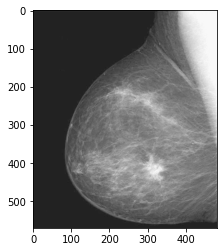

In [9]:
nueva = image_adjust(breast,range_in=(0,1),range_out=(0,1),gamma=0.05)
plt.imshow(nueva , cmap='gray');

#### 1(c). 
- Pruebe la función de `image_adjust` expandiendo las intensidades mínima y máxima de la imagen `breast` al rango de (0.5,0.75).
- Pruebe también a mejorar la imagen aplicando sólo un `gamma=2`.  
- Usando `numpy.percentile` reescale las intensidades  mínima y máxima de `breast` al percentile 1 y 99 (`gamma=1`) sobre la imagen original y la imagen invertidad.
- Grafique todas las imágenes en una sóla figura (original, invertida, ajustadas...)

#### 1(d) Grafique el histograma de la imagen `breast` usando `plt.hist()` (o en `axis.hist()` al crear ejes). 

#### 1(e). Explorando el modulo `skimage.exposure`. Utilice `exposure.rescale_intensity`, `exposure.adjust_gamma`, `exposure.adjust_log`, `exposure.equalize_hist` y `exposure_equalize_adapthist` para mejorar el contraste de la imagen `breast` y grafique el resultado comparando con la imagen original. Explique que están realizando los métodos anteriores (por ejemplo grafique también los histogramas y explique que hacen los algoritmos). 

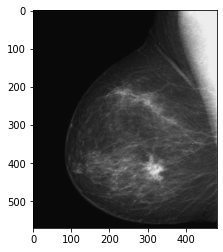

In [10]:
# 1(c)-a
nueva = image_adjust(breast,range_in=(0,1),range_out=(0.5,0.75),gamma=1)
plt.imshow(nueva , cmap='gray');

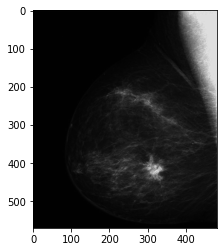

In [11]:
# 1(c)-b
nueva = image_adjust(breast,range_in=(0,1),range_out=(0.5,0.75),gamma=2)
plt.imshow(nueva , cmap='gray');

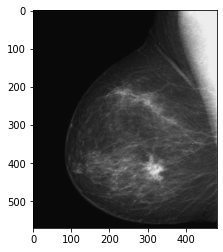

In [12]:
# 1(c)-c1
import numpy as np
breastI = skimage.util.img_as_float(breast)
p1 = np.percentile(breastI ,1)
p99 = np.percentile(breastI ,99)
nueva = image_adjust(breast,range_in=(p1,p99),range_out=(0,1),gamma=1)
plt.imshow(nueva , cmap='gray');

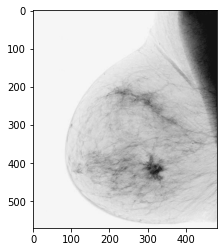

In [13]:
breast_inv = breast.max()-breast
nueva = image_adjust(breast_inv,range_in=(p1,p99),range_out=(0,1),gamma=1)
plt.imshow(nueva , cmap='gray');

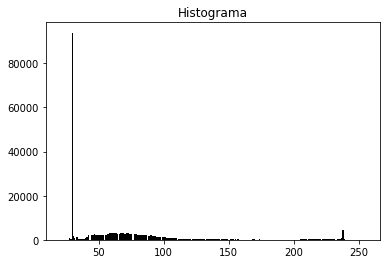

In [14]:
# 1 d)
plt.hist(breast.flatten(),bins=255,color='black')
plt.title("Histograma")
plt.show()

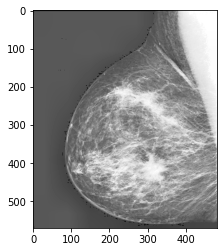

In [15]:
import skimage.exposure as exposure
# 1 (c) - e
nueva = exposure.rescale_intensity(breast,in_range=(0,255),out_range=(0,255))
nueva = exposure.exposure.adjust_gamma(nueva,gamma=3)
nueva =  exposure.adjust_log(nueva)
nueva = exposure.equalize_hist(nueva,nbins=256)
nueva = exposure.equalize_adapthist(nueva)
plt.imshow(nueva , cmap='gray');

#### 2(a). Realice una función de convolución 
Cree una función de convolución (sin reflejar el filtro, es decir una correlación). Recuerde que la convolución consiste en mover el filtro e ir ponderando una vecindad de pixeles (dependiendo del tamaño del filtro) y sustituyendo el pixel central por el valor ponderado:
![](https://github.com/santialferez/introCV/blob/main/S7_taller/images/convolution.png?raw=1)

La función debe tener la forma de `convolucion_imagen(imagen, filtro, preservar)` y debe rellenar los bordes con ceros para mantener el mismo tamaño de la imagen original. Para imágenes en escala de grises es la clásica convolución en la que se pondera los valores. Sin embargo, si es una imagen con múltiples canales (o componentes) se debe particularizar los casos mediante el parámetro de `preservar`:

- Si `preservar` es `True` se debe producir una imagen con los mismos canales que la imagen de entrada. Esto significa que cada canal en la imagen debe ser separadamente filtrado por el mismo kernel de filtro.

- Si `preservar` es `False` se debe retornar una imagen de escala de grises (un canal), lo cuál es producido mediante la aplicación del filtro a cada canal, y sumando los canales resultantes.

Recuerde que el kernel debe tener sólo un canal (y debe ser verificado). 

La idea (como en el primer ejercicio) es crear una función desde "cero", haciendo uso de las facultades de skimage para representar imagenes como arrays de numpy (no mucho más alla...).

#### 2(b). Pruebe la convolución realizada
Tomese una foto, o tome una foto con el celular de algunos objetos (recuerde disminuir el tamaño a una resolución no tan alta) y pruebe la convolución con un filtro promedio de tamaño $5 \times 5$.

#### 2(c). Pruebe diferentes tipos de kernels

Defina los siguientes kernels y realice el filtrado con cada uno de ellos para generar diferentes imágenes:

Highpass                   |  Sharpen                  | Emboss
:-------------------------:|:-------------------------:|:--------------------|
![](https://github.com/santialferez/introCV/blob/main/S7_taller/images/highpass.png?raw=1)     | ![](https://github.com/santialferez/introCV/blob/main/S7_taller/images/sharpen.png?raw=1)     | ![](https://github.com/santialferez/introCV/blob/main/S7_taller/images/emboss.png?raw=1)


#### 2(d). Implemente el kernel gaussiano visto en clase (S6, diapo 23)
Implemente el kernel gaussiano y apliquelo sobre la imagen que tomó antes.

#### 2(e). Implemente los filtros de sobel para estimar las componentes del gradiente. Muestre el resultado sobre la imagen tomada anteriormente (reescale la imagen entre 0 y 1 para visualizar mejor los resultados).

#### 2(f) Calcule la magnitud y fase del gradiente usando la aproximación de los filtro Sobel ([ver este link](https://en.wikipedia.org/wiki/Sobel_operator#Formulation))

Gx                 |  Gy 
:-----------------:|:------------------:
![](https://github.com/santialferez/introCV/blob/main/S7_taller/images/gx.png?raw=1)   |  ![](https://github.com/santialferez/introCV/blob/main/S7_taller/images/gy.png?raw=1)


#### 2(g). Intente reproducir todos los puntos anteriores usando `scipy.ndimage.convolve` y algunas de las funciones en el modulo `skimage.filters`, como `gaussian`, `sobel`, etc.

### Solución

In [98]:
from skimage import color

# Funcion
def convolucion_imagen(imagen,filtro,preservar):
    # Convolution operation
    correlation = lambda vecinos,filtro : np.sum(vecinos*filtro)
    # Filter size
    filter_size = filtro.shape[0]
    # Border size
    bSize = int(filter_size/2)
    # Copia de la imagen
    n_image = skimage.util.img_as_float(imagen.copy())
    # Bandera paridad
    p = 0 if filter_size%2 ==0 else 1
    if(len(filtro.shape)==2 and (preservar == False or len(imagen.shape)==2)):
        n_image = color.rgb2gray(n_image) if len(imagen.shape)==3 else n_image
        # Border with zeros
        n_image = np.pad(n_image, pad_width=bSize, mode='constant', constant_values=0)
        # Image size
        row,col = n_image.shape
        for i in range(bSize,row-bSize-1):
            for j in range(bSize,col-bSize-1):
                M = n_image[i-bSize:i+bSize+p,j-bSize:j+bSize+p]
                n_image[i,j] = correlation(M,filtro)
    elif(len(imagen.shape)==3 and len(filtro.shape)==2 and preservar == True):
        r = np.pad(n_image[:,:,0], pad_width=bSize, mode='constant', constant_values=0)
        g = np.pad(n_image[:,:,1], pad_width=bSize, mode='constant', constant_values=0)
        b = np.pad(n_image[:,:,2], pad_width=bSize, mode='constant', constant_values=0)
        # Image size
        row,col = n_image.shape[0:2]
        for i in range(bSize,row-bSize-1):
            for j in range(bSize,col-bSize-1):
                r_v = r[i-bSize:i+bSize+p,j-bSize:j+bSize+p]
                g_v = g[i-bSize:i+bSize+p,j-bSize:j+bSize+p]
                b_v = b[i-bSize:i+bSize+p,j-bSize:j+bSize+p]
                n_image[i-bSize,j-bSize,0] = correlation(r_v,filtro)
                n_image[i-bSize,j-bSize,1] = correlation(g_v,filtro)
                n_image[i-bSize,j-bSize,2] = correlation(b_v,filtro)
    else:
        pass
    return n_image

(200, 300, 3)

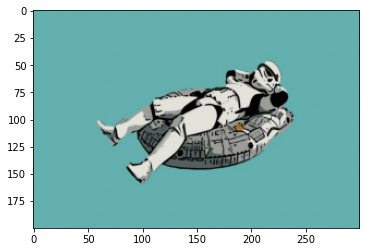

In [136]:
# Punto 2.b
import numpy as np
from skimage.transform import rescale, resize
A = 1/25*np.ones((5,5))
fondo = resize(io.imread('fondo.jpg'),(200,300))
plt.imshow(fondo,cmap='gray')
fondo.shape

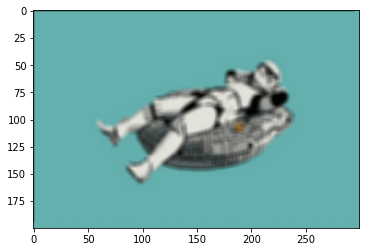

In [105]:
M = convolucion_imagen(fondo,A,True)
plt.imshow(M,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


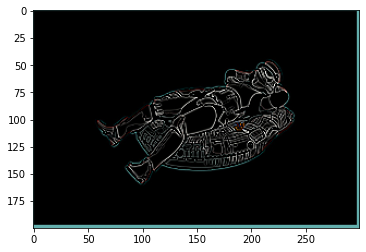

In [102]:
# Punto 2.c

# Highpass
Hp = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
I_hp = convolucion_imagen(fondo,Hp,True)
plt.imshow(I_hp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


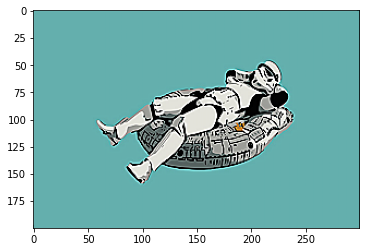

In [20]:
#Sharpen
Sh = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
I_sh = convolucion_imagen(fondo,Sh,True)
plt.imshow(I_sh)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


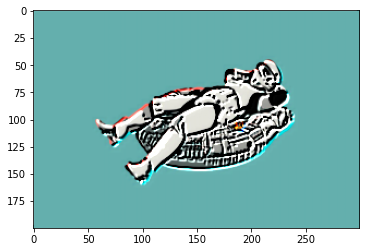

In [139]:
#Emboss
Em = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
I_em = convolucion_imagen(fondo,Em,True)
plt.imshow(I_em);

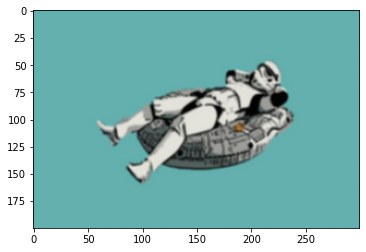

In [22]:
# Punto 2.d

# Filtro Gaussiano
Gu = 1/4.8976*np.array([[0.3679,0.6065,0.3679],[0.6065,1,0.6065],[0.3679,0.6065,0.3679]])
I_gu = convolucion_imagen(fondo,Gu,True)
plt.imshow(I_gu)

In [23]:
# Punto 2.e

s1 = np.array([[-1,2,-1],[0,0,0],[1,2,1]])
s2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

f_fondo = skimage.util.img_as_float(fondo)
fI_s1 = convolucion_imagen(f_fondo,s1,True)
fI_s2 = convolucion_imagen(f_fondo,s2,True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


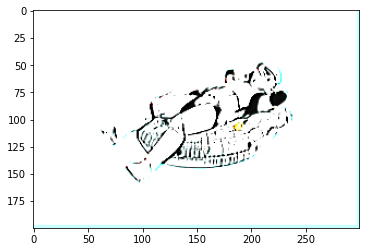

In [24]:
plt.imshow(fI_s1+fI_s2)

(200, 300, 3)


<ipython-input-88-cca46e6f55de>:6: RuntimeWarning: overflow encountered in multiply
  correlation = lambda vecinos,filtro : np.sum(vecinos*filtro)
<ipython-input-88-cca46e6f55de>:6: RuntimeWarning: invalid value encountered in multiply
  correlation = lambda vecinos,filtro : np.sum(vecinos*filtro)


(200, 300, 3)


<ipython-input-97-cec46937bcb2>:10: RuntimeWarning: overflow encountered in multiply
  G = np.sqrt(Gx*Gx+Gy*Gy)


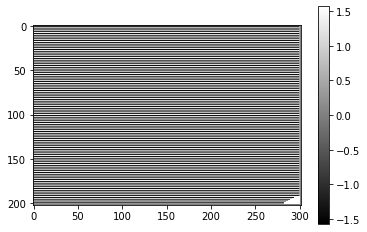

In [97]:
# Punto 2.f

f1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
f2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

Gx = convolucion_imagen(fondo,f1,False)
Gy = convolucion_imagen(fondo,f2,False)

# Magnitud
G = np.sqrt(Gx*Gx+Gy*Gy)

# Direccion
O = np.arctan(Gx,Gy)
plt.imshow(O,cmap='gray')
plt.colorbar()

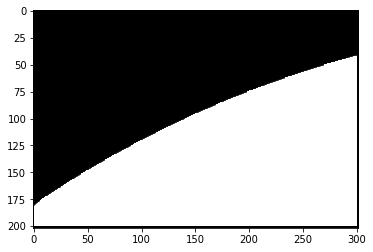

In [106]:
plt.imshow(G,cmap='gray')

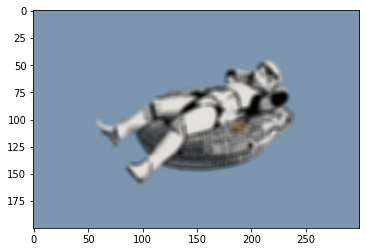

In [108]:
# Punto 2.g

from scipy.ndimage import convolve
from skimage import filters
import scipy

A = 1/(25*3)*np.ones((5,5,3))
# Mean
me = convolve(fondo, A)
plt.imshow(me)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


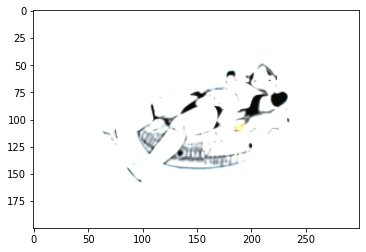

In [137]:
# Gaussian
Gu = 1/4.8976*np.array([[0.3679,0.6065,0.3679],[0.6065,1,0.6065],[0.3679,0.6065,0.3679]])*np.ones((3,3,3))
Ga = convolve(fondo, Gu)
plt.imshow(Ga)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


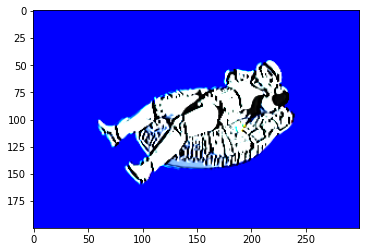

In [138]:
#Emboss
Em = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])*np.ones((3,3,3))
Emb = convolve(fondo, Em)
plt.imshow(Emb)

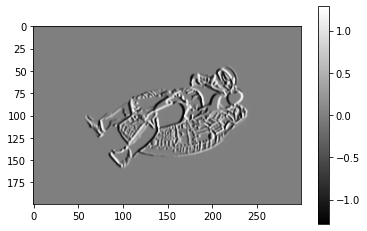

In [144]:
# Sobel
f1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
f2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

Gx = convolve(fondo[:,:,1],f1)
Gy = convolve(fondo[:,:,1],f2)

# Magnitud
G = np.sqrt(Gx*Gx+Gy*Gy)

# Direccion
O = np.arctan(Gx,Gy)
plt.imshow(O,cmap='gray')
plt.colorbar()

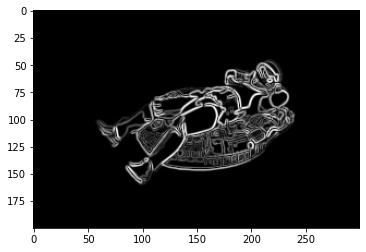

In [145]:
plt.imshow(G,cmap='gray')

#### 3. Una pequeña vista a la transformada de Fourier

##### 3(a) Realice la FFT de la imagen en escala de grises que se tomo anteriormente. Para esto use `scipy.fftpack.fft2` seguido de `scipy.fftpack.fftshift` (debe desplazar la FFT, ¿por qué?). Recuerde graficar el espectro (use `np.abs`). 

##### 3(b) Ahora multiplique la imagen (en escala de grises) por una ventana tipo "Hann", usando `skimage.filters.window` con un tamaño igual al de la imagen. Grafique la FFT del resultado (al multiplicar) siguiendo el mismo procedimiento de 3(a).  ¿Cómo difieren los espectros? ¿Cómo explica esta diferencia?

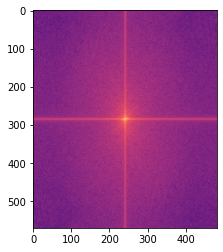

In [129]:
# Punto a)

from scipy.fftpack import fft2, fftshift

breastFourie = fft2(breast)
breastShift = fftshift(breastFourie)
plt.imshow(np.log(np.abs(breastShift)),cmap='magma');

La imagen debe ser desplazada pues la transformada de fourie desfaza a la señal. Al aplicar el ffshift se centran nuevamente las frecuencias en el espectro.

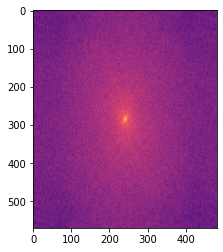

In [119]:
from skimage.filters import window

breastHann = breast * window('hann', breast.shape)
breastFourie = fft2(breastHann)
breastShift = fftshift(breastFourie)
plt.imshow(np.log(np.abs(breastShift)),cmap='magma');